In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import numpy as np
import time

import torch 
from torch import nn
from torch import optim
import torch.nn.functional as F

In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), 
                                  transforms.Normalize((0.1307,), (0.3081,)),
                                 ])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[1], output_size))]))

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
def validation(model, testloader, criterion):
  test_loss = 0
  accuracy = 0
  for images, labels in testloader:
    images.resize_(images.shape[0], 784)

    output = model.forward(images)
    test_loss += criterion(output, labels).item()

    ps = F.softmax(output, dim=1)
    equality = (labels.data==ps.max(dim=1)[1])
    accuracy = equality.type(torch.FloatTensor).mean()
  return test_loss, accuracy

In [ ]:
epochs = 3
print_every = 64
steps = 0
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    steps += 1
    images.resize_(images.shape[0], 784)

    optimizer.zero_grad()

    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if steps % print_every == 0:

      with torch.no_grad():
        test_loss, accuracy = validation(model, testloader, criterion)

      print("Epoch: {}/{}...".format(e+1, epochs),
            "Training Loss: {:.3f}".format(running_loss/print_every),
            "Test Loss: {:.3f}".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(accuracy))
      
      running_loss = 0

Epoch: 1/3... Training Loss: 2.248 Test Loss: 2.162 Test Accuracy: 0.500
Epoch: 1/3... Training Loss: 2.023 Test Loss: 1.838 Test Accuracy: 0.688
Epoch: 1/3... Training Loss: 1.603 Test Loss: 1.337 Test Accuracy: 0.656
Epoch: 1/3... Training Loss: 1.132 Test Loss: 0.932 Test Accuracy: 0.750
Epoch: 1/3... Training Loss: 0.819 Test Loss: 0.716 Test Accuracy: 0.781
Epoch: 1/3... Training Loss: 0.669 Test Loss: 0.606 Test Accuracy: 0.844
Epoch: 1/3... Training Loss: 0.574 Test Loss: 0.536 Test Accuracy: 0.875
Epoch: 1/3... Training Loss: 0.498 Test Loss: 0.492 Test Accuracy: 0.844
Epoch: 1/3... Training Loss: 0.460 Test Loss: 0.457 Test Accuracy: 0.781
Epoch: 1/3... Training Loss: 0.425 Test Loss: 0.429 Test Accuracy: 0.875
Epoch: 1/3... Training Loss: 0.416 Test Loss: 0.404 Test Accuracy: 0.719
Epoch: 1/3... Training Loss: 0.399 Test Loss: 0.389 Test Accuracy: 0.906
Epoch: 1/3... Training Loss: 0.387 Test Loss: 0.374 Test Accuracy: 0.875
Epoch: 1/3... Training Loss: 0.369 Test Loss: 0.364

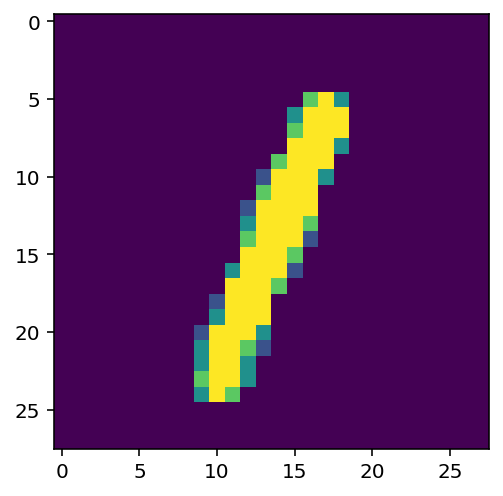

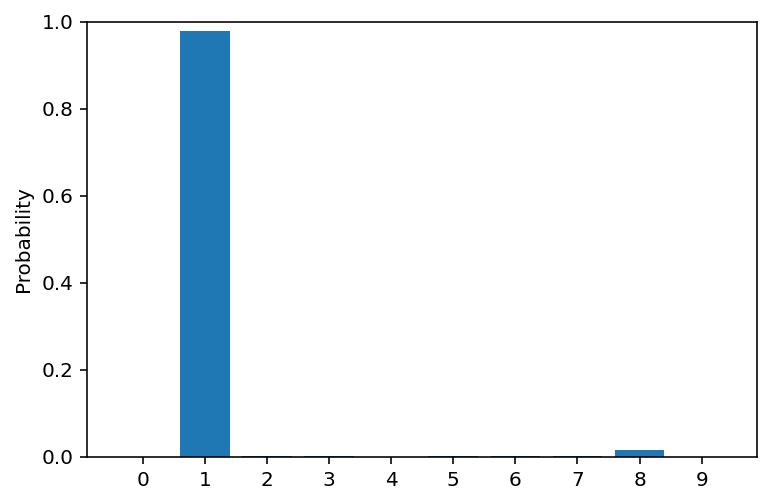

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images, labels = next(iter(trainloader))

img = images[7].view(1, 784)
plt.imshow(images[7][0])
plt.show()

with torch.no_grad():
  logits = model.forward(img)

prob = F.softmax(logits, dim=1)
y = prob.detach()[0].numpy()
x = [x for x in range(10)]

plt.ylim([0, 1])
p1 = plt.bar(x, y)
plt.ylabel('Probability')
plt.xticks(x)

plt.show()

In [ ]:
torch.save(model, 'checkpoint.pth')

In [ ]:
model = torch.load('checkpoint.pth')

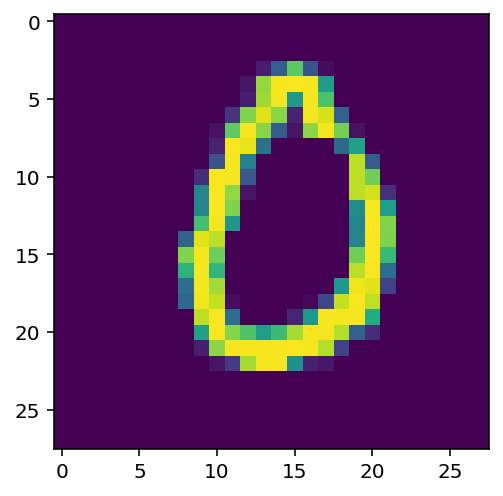

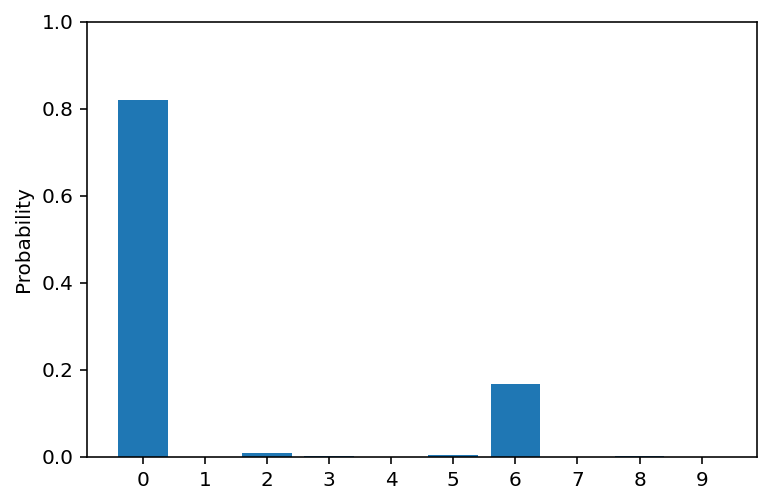

In [ ]:
images, labels = next(iter(trainloader))

img = images[7].view(1, 784)
plt.imshow(images[7][0])
plt.show()

with torch.no_grad():
  logits = model.forward(img)

prob = F.softmax(logits, dim=1)
y = prob.detach()[0].numpy()
x = [x for x in range(10)]

plt.ylim([0, 1])
p1 = plt.bar(x, y)
plt.ylabel('Probability')
plt.xticks(x)

plt.show()

In [ ]:
# from google.colab import files
# files.download('checkpoint.pth')